The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


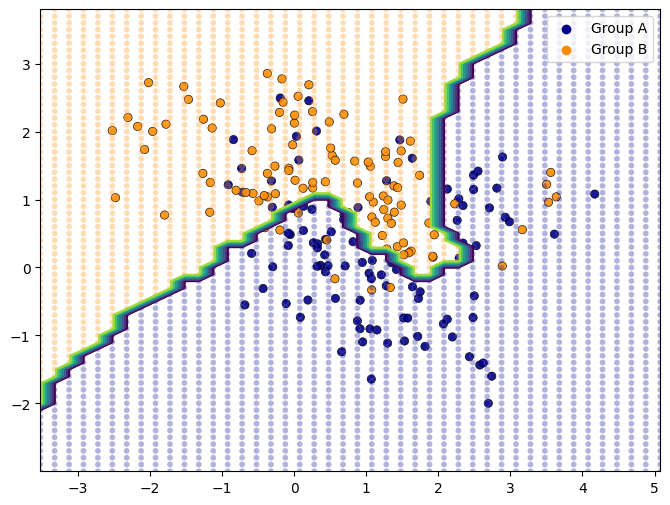

In [42]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data_dir = "D:/vscodepython/Statistical Calculation/Homework4_Regression/"
img_dir = "D:/vscodepython/Statistical Calculation/Homework5_LDA/image_hw5/"

D = np.loadtxt(data_dir + "la_3.txt", comments="%")
X = D[:, 0:2]
y = D[:,2].astype("int") # convert to integers # 裡面讀出來可能是實數，把讀出來的值變成整數
n = len(y)

cmap_bold = ["darkblue", "darkorange"]
Group_name = np.array(["Group A", "Group B"])
plt.figure(figsize=(8, 6))
#sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y, palette = cmap_bold, alpha = 0.9, edgecolor = "black")
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold, alpha = 0.9, edgecolor = "black")
# hue: 色澤 


# KNN learning
K = 15
intrvl = 0.2 # grid interval
x_min, x_max = X[:,0].min() -1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
#list 要切幾格
xx, yy = np.meshgrid(np.arange(x_min, x_max, intrvl), np.arange(y_min, y_max, 0.1)) # grid points: matrices

#xx.size:3036
#xx.shape:69*44
z = np.zeros(xx.size) # a vector for KNN predictions
for i in range(xx.size) :
  # x_1(new), X_2(new)
  tmp = np.tile([xx.ravel()[i], yy.ravel()[i]], (n, 1)) #tile:複製 #ravel:拉開 # 200*2矩陣
  #d = ((tmp-X)**2).sum(axis=1) #兩種都可以
  d = np.linalg.norm(tmp - X, axis = 1) # n distances
  idx = np.argsort(d) # sorting K distances
  z[i] = np.mean(y[idx[:K]]) # average K sorted y−values

#for i in range(xx.size) :
#  d = np.zeros(n)
#  for j in range(n):
#    x1 = xx.ravel()[i]
#    x2 = yy.ravel()[i]
#    d[j] = (x1 - X[j, 0])**2 + (x2 - X[j, 1])**2
#  idx = np.argsort(d) # sorting K distances
#  z[i] = np.mean(y[idx[:K]]) # average K sorted y−values

z = [0 if i < 0.5 else 1 for i in z]

sns.scatterplot(x = xx.ravel(), y = yy.ravel(), size = 2, markers = ".", palette = cmap_bold, hue = z, alpha = 0.3, legend = False)

#剛剛把z拉成了向量，現在要把它變回矩陣
Z = np.reshape(z, xx.shape) # reshape z to a matrix
plt.contour(xx, yy, Z)
plt.contour(xx, yy, Z)
plt.savefig(img_dir+"knn1.eps", format="eps")

0.10133333333333339


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.14066666666666672


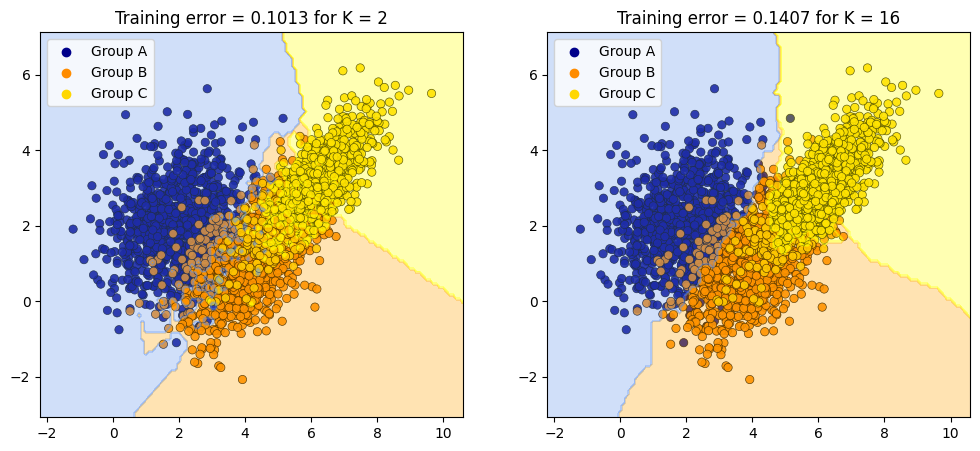

In [68]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import multivariate_normal
import sklearn.neighbors as neighbors
from matplotlib.colors import ListedColormap
from sklearn import datasets, neighbors


n1, n2, n3 = 1000, 1000, 1000
mean1, mean2, mean3, mean4, mean5, mean6  = 2, 2, 4, 1, 6, 3
val1, val2, val3 = 0.2, 0.5, 0.8
m1, m2, m3 = np.array([mean1, mean2]), np.array([mean3, mean4]), np.array([mean5, mean6])
Cov1 = np.array([[1, val1], [val1, 1]])
Cov2 = np.array([[1, val2], [val2, 1]])
Cov3 = np.array([[1, val3], [val3, 1]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
mvn3 = multivariate_normal(mean = m3, cov = Cov3)
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
C = mvn3.rvs(n3)
Xvar = np.vstack((A, B, C))#2000*1矩陣\
y = np.hstack((np.zeros(n1), np.ones(n2), np.ones(n3)+1))#2000
D = np.c_[Xvar, y]

data = X = D[:,0:2]
label = y = D[:,2].astype("int") # convert to integers # 裡面讀出來可能是實數，把讀出來的值變成整數
n = len(y)

# ------------------------------------------------------------------
K = 2
weights = "uniform"
Knn = neighbors.KNeighborsClassifier(K, weights = weights)
Knn.fit(X, y)
trainingErr = 1 - Knn.score(X, y)
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),\
np.arange(y_min, y_max, 0.1))
z = Knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = z.reshape(xx.shape)

print(1 - Knn.score(X, y))

cmap_light = ListedColormap(["cornflowerblue", "orange", "yellow"])
cmap_bold = ["darkblue", "darkorange", "gold"]
Group_name = np.array(["Group A", "Group B", "Group C"])
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold, alpha = 0.9, edgecolor = "black")
plt.contourf(xx, yy, Z, cmap = cmap_light, alpha = 0.3)
plt.title("Training error = %.4f for K = %i" % (trainingErr, K))

# ----------------------------------------------------------------------------------

K = 16
weights = "uniform"
Knn = neighbors.KNeighborsClassifier(K, weights = weights)
Knn.fit(X, y)
trainingErr = 1 - Knn.score(X, y)
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),\
np.arange(y_min, y_max, 0.1))
z = Knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = z.reshape(xx.shape)
print(1 - Knn.score(X, y))
cmap_light = ListedColormap(["cornflowerblue", "orange", "yellow"])
cmap_bold = ["darkblue", "darkorange", "gold"]
Group_name = np.array(["Group A", "Group B", "Group C"])

plt.subplot(1, 2, 2)
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold, alpha = 0.9, edgecolor = "black")
plt.contourf(xx, yy, Z, cmap = cmap_light, alpha = 0.3)
plt.title("Training error = %.4f for K = %i" % (trainingErr, K))
plt.savefig(img_dir+"knnclassk=216.eps", format="eps")


0.023499999999999965


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.021499999999999964


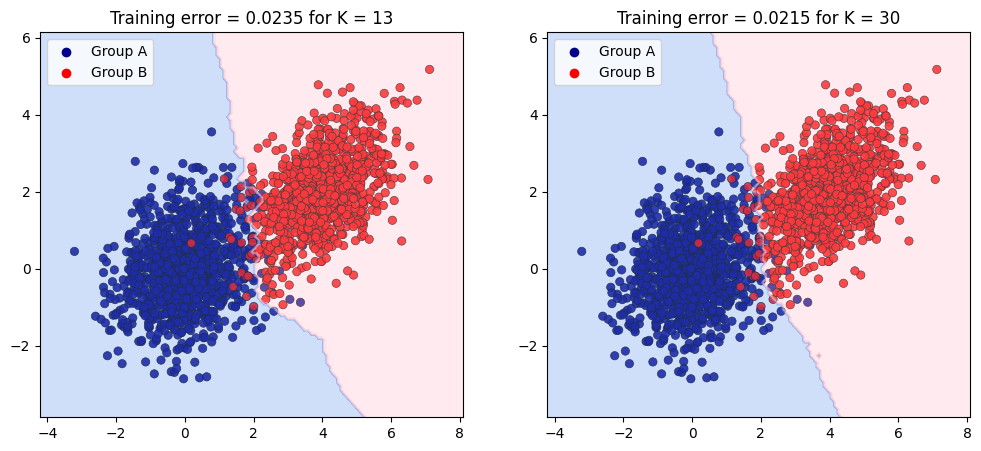

In [71]:
n1, n2 = 1000, 1000
mean1, mean2, mean3, mean4  = 0, 0, 4, 2
val1, val2 = 0.2, 0.5
m1, m2 = np.array([mean1, mean2]), np.array([mean3, mean4])
Cov1 = np.array([[1, val1], [val1, 1]])
Cov2 = np.array([[1, val2], [val2, 1]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
Xvar = np.vstack((A, B))#2000*1矩陣\
y = np.hstack((np.zeros(n1), np.ones(n2)))#2000
D = np.c_[Xvar, y]

data = X = D[:,0:2]
label = y = D[:,2].astype("int") # convert to integers # 裡面讀出來可能是實數，把讀出來的值變成整數
n = len(y)

# ------------------------------------------------------------------
K = 13
weights = "uniform"
Knn = neighbors.KNeighborsClassifier(K, weights = weights)
Knn.fit(X, y)
trainingErr = 1 - Knn.score(X, y)
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),\
np.arange(y_min, y_max, 0.1))
z = Knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = z.reshape(xx.shape)

print(1 - Knn.score(X, y))

cmap_light = ListedColormap(["cornflowerblue", "pink"])
cmap_bold = ["darkblue", "red"]
Group_name = np.array(["Group A", "Group B"])
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold, alpha = 0.9, edgecolor = "black")
plt.contourf(xx, yy, Z, cmap = cmap_light, alpha = 0.3)
plt.title("Training error = %.4f for K = %i" % (trainingErr, K))

# ----------------------------------------------------------------------------------

K = 30
weights = "uniform"
Knn = neighbors.KNeighborsClassifier(K, weights = weights)
Knn.fit(X, y)
trainingErr = 1 - Knn.score(X, y)
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),\
np.arange(y_min, y_max, 0.1))
z = Knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = z.reshape(xx.shape)
print(1 - Knn.score(X, y))
cmap_light = ListedColormap(["cornflowerblue", "pink"])
cmap_bold = ["darkblue", "red"]
Group_name = np.array(["Group A", "Group B"])
plt.subplot(1, 2, 2)
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold, alpha = 0.9, edgecolor = "black")
plt.contourf(xx, yy, Z, cmap = cmap_light, alpha = 0.3)
plt.title("Training error = %.4f for K = %i" % (trainingErr, K))
plt.savefig(img_dir+"knnclassk=1330.eps", format="eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


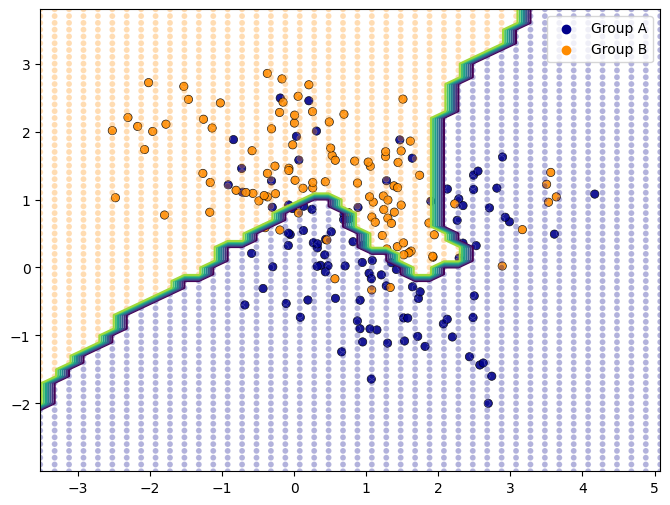

In [27]:
D = np.loadtxt(data_dir + "la_3.txt", comments="%")
X = D[:, 0:2]
y = D[:,2].astype("int") # convert to integers # 裡面讀出來可能是實數，把讀出來的值變成整數
n = len(y)

cmap_bold = ["darkblue", "darkorange"]
Group_name = np.array(["Group A", "Group B"])
plt.figure(figsize=(8, 6))
#sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y, palette = cmap_bold, alpha = 0.9, edgecolor = "black")
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold, alpha = 0.9, edgecolor = "black")
# hue: 色澤 


# KNN learning
K = 15
intrvl = 0.2 # grid interval
x_min, x_max = X[:,0].min() -1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
#list 要切幾格
xx, yy = np.meshgrid(np.arange(x_min, x_max, intrvl), np.arange(y_min, y_max, 0.1)) # grid points: matrices

z = np.zeros(xx.size) # a vector for KNN predictions
for i in range(xx.size) :
  # x_1(new), X_2(new)
  tmp = np.tile([xx.ravel()[i], yy.ravel()[i]], (n, 1)) #tile:複製 #ravel:拉開 # 200*2矩陣
  #d = ((tmp-X)**2).sum(axis=1) #兩種都可以
  d = np.linalg.norm(tmp - X, axis = 1) # n distances
  idx = np.argsort(d) # sorting K distances
  z[i] = np.median(y[idx[:K]]) # average K sorted y−values

#for i in range(xx.size) :
#  d = np.zeros(n)
#  for j in range(n):
#    x1 = xx.ravel()[i]
#    x2 = yy.ravel()[i]
#    d[j] = (x1 - X[j, 0])**2 + (x2 - X[j, 1])**2
#  idx = np.argsort(d) # sorting K distances
#  z[i] = np.mean(y[idx[:K]]) # average K sorted y−values

z = [0 if i < 0.5 else 1 for i in z]

sns.scatterplot(x = xx.ravel(), y = yy.ravel(), size = 2, markers = ".", palette = cmap_bold, hue = z, alpha = 0.3, legend = False)

#剛剛把z拉成了向量，現在要把它變回矩陣
Z = np.reshape(z, xx.shape) # reshape z to a matrix
plt.contour(xx, yy, Z)
#plt.contour(xx, yy, Z)
plt.savefig(img_dir+"knn2.eps", format="eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.15500000000000003


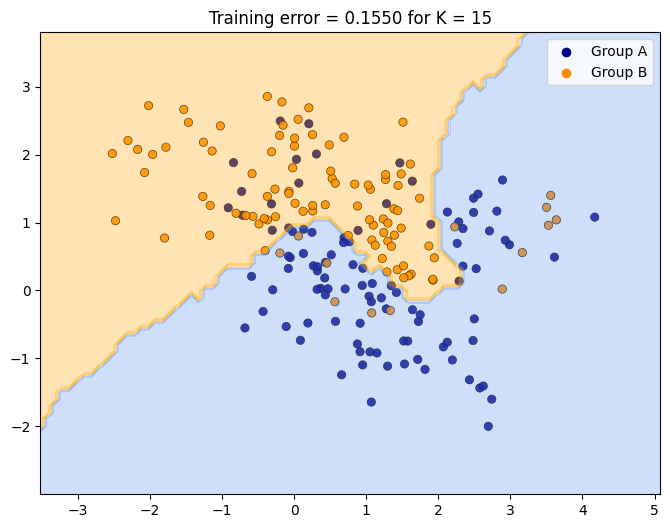

In [36]:
import sklearn.neighbors as neighbors
from matplotlib.colors import ListedColormap
from sklearn import datasets, neighbors

D = np.loadtxt(data_dir + "la_3.txt", comments="%")
X = D[:, 0:2]
y = D[:,2].astype("int") # convert to integers # 裡面讀出來可能是實數，把讀出來的值變成整數
n = len(y)

###sklearn套件配knn模型
K = 15
weights = "uniform"
Knn = neighbors.KNeighborsClassifier(K, weights = weights)
Knn.fit(X, y)
trainingErr = 1 - Knn.score(X, y)
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),\
np.arange(y_min, y_max, 0.1))
z = Knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = z.reshape(xx.shape)

print(1 - Knn.score(X, y))
cmap_light = ListedColormap(["cornflowerblue", "orange"])
cmap_bold = ["darkblue", "darkorange"]
Group_name = np.array(["Group A", "Group B"])


plt.figure(figsize=(8, 6))
#sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y, palette = cmap_bold, alpha = 0.9, edgecolor = "black")
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold, alpha = 0.9, edgecolor = "black")
# hue: 色澤 
plt.contourf(xx, yy, Z, cmap = cmap_light, alpha = 0.3)
plt.title("Training error = %.4f for K = %i" % (trainingErr, K))
plt.savefig(img_dir+"knn3.eps", format="eps")
